# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.


# **PACE stages**


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The HR department and leadership team of Salifort Motors are the stakeholders for this project.
2. The aim of the project is to uncover the reasons behind employee turnover and build either a ststistical or machine learning model to predict if an employee would leave or stay in the company.
3. At this point of the project, most employees in the company have worked for less than 5 years.
4. I find myself consulting notebooks on performing certain basics EDA tasks such as Boolean Masking
5. Yes, the inclusion or exclusion of outliers in model development. Further revelation in the data would reveal the next action to take on this.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [81]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, \
classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:


# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'average_montly_hours':'average_monthly_hours', 'Work_accident':'work_accident', 'Department':'department',
                     'time_spend_company':'tenure', 'number_project':'number_projects'}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_subset = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_subset.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

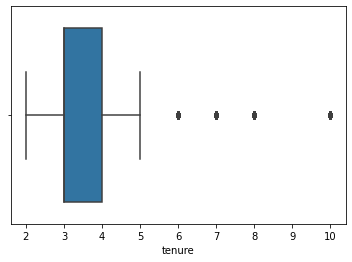

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df0_subset, x='tenure')


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df0_subset[df0_subset['tenure'] > 5]


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df0_subset['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df0_subset['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

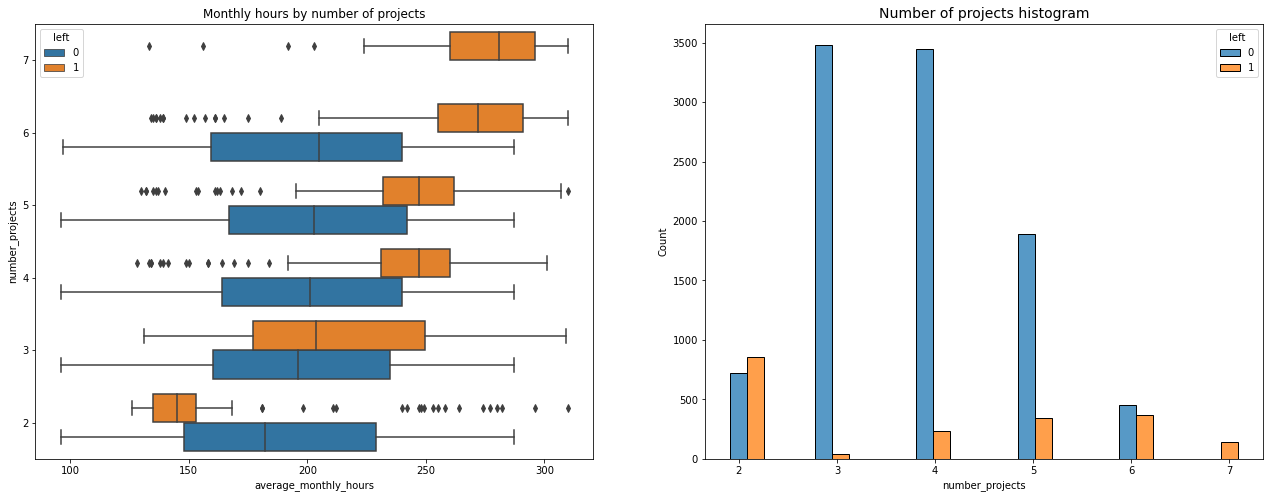

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df0_subset, x='average_monthly_hours', y='number_projects', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

sns.histplot(data=df0_subset, x='number_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

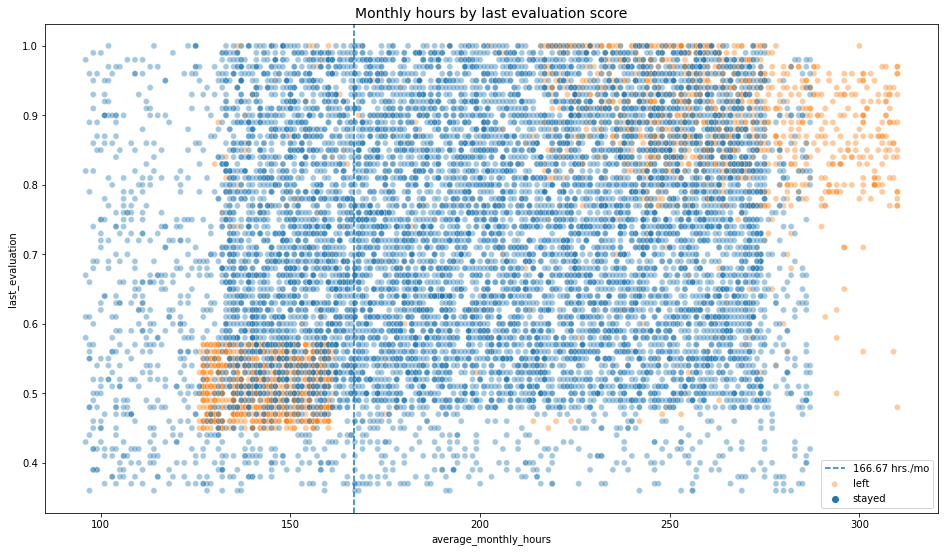

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0_subset, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, label='166.67 hrs/mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

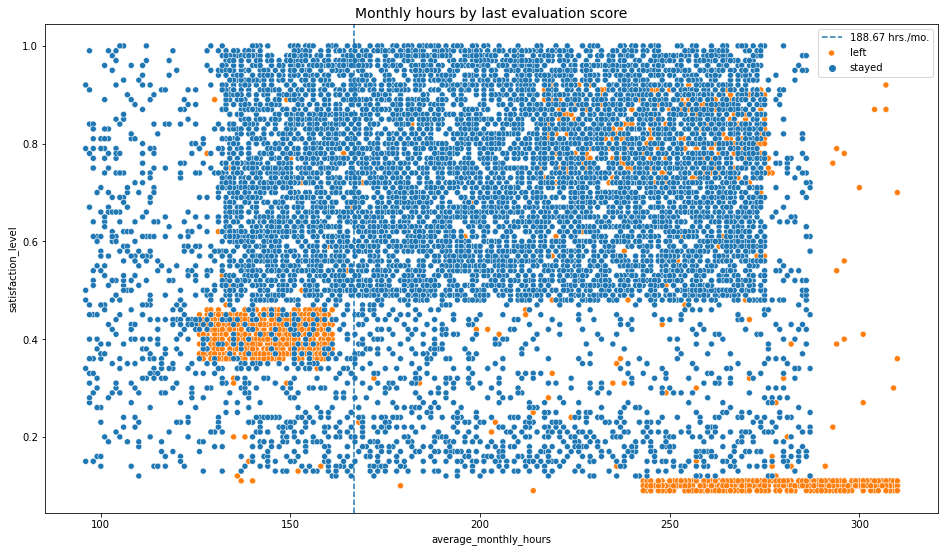

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0_subset, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.axvline(x=166.67, label='166.67hrs./mo.', ls='--')
plt.legend(labels=['188.67 hrs./mo.', 'left','stayed'])
plt.title('Monthly hours by last evaluation score',fontsize='14')

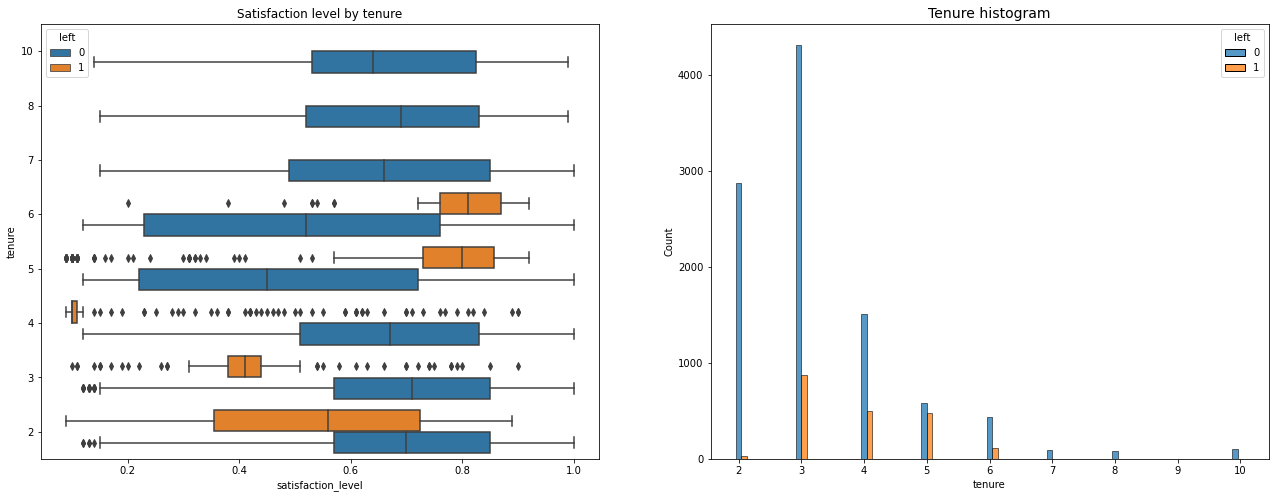

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df0_subset, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure')

sns.histplot(data=df0_subset, x='tenure', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

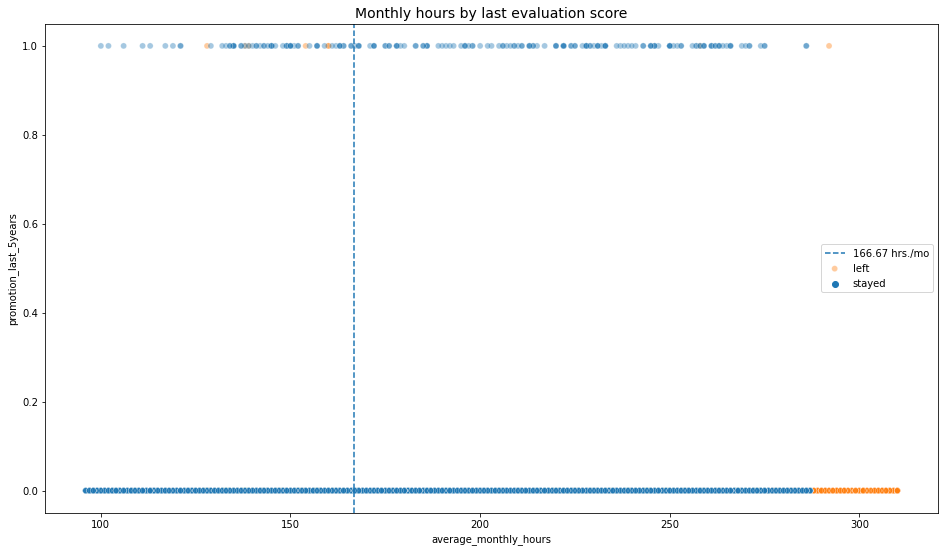

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0_subset, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, label='166.67 hrs/mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

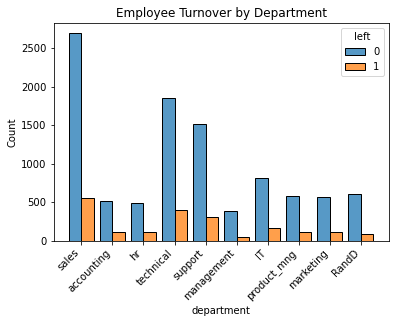

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df0_subset, x='department', hue='left', multiple='dodge', shrink=0.8)
plt.title('Employee Turnover by Department')
plt.xticks(rotation = 45, horizontalalignment='right')

Text(0.5, 1.0, 'Employee Turnover by Salary')

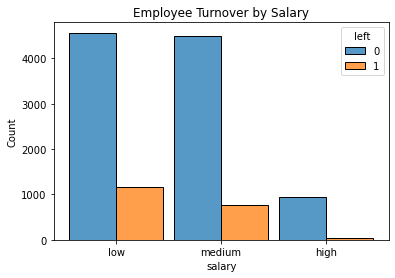

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df0_subset, x='salary', hue='left',shrink=0.9, multiple='dodge')
plt.title("Employee Turnover by Salary")

Text(0.5, 1.0, 'Employee Turnover by Department')

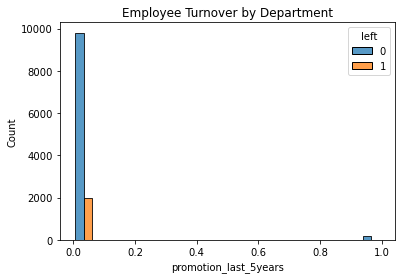

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
##plt.pie(df0_subset.groupby('promotion_last_5years')['left'].count(), labels=[ 'stayed'])
sns.histplot(data=df0_subset, x='promotion_last_5years', hue='left', multiple='dodge', shrink=0.8)
plt.title('Employee Turnover by Department')

### Insights

1. The boxplot and histogram showing the average monthly hours and number works reveals that the more project worked on, the higher the monthly average hour worked. The visualization showed that for employees who have worked on 2 projects, majority of those who left worked less average monthly hours thab those who stayed. It is possible that such employees were fire for underperformance or were assigned fewer tasks based on previous notice of their departure. However for employees who have worked on 3-6 projects, most of these employees who left worked for more average monthly hours than those who stayed. And for employyes who worked on 7 projects, all left. This reveals that there are 2 classess of employees who left, those who worked less than their colleagues and those who worked significantly more. The employees who stayed and worked on 3-6 projects have a mean average monthly hour of 200, which means employees work about 46 hours weekly. It is possible that employees are overworked.
2. The scatter plot showing the relationship between average monthly hours and last evaluation reveals a high corellation betweens hours worked and evaluation score. It aslo revealed two classes of employees that left the company. Those who score about 50-60% in their last evaluation but worked for less than a monthly average of 167 hours, which is less than 38 hours per week. The second class of employees that left are those who scored high in their last evaluation (80-100%) and worked more than 250 hours per month on average, which is more than 57 hours per week. Hence, it can be said that employees who underwork and overwork left the company. A fair number of employees work slighly below or above 200 hours on average every month. This translates to 46 hours per week, well over the standard of 40. This indicates that the employees are overworked.
3. The scatterplot showing the relationship between average monthly hours and satisfaction level reveals that majority of employee who left the company had a satisfaction level of 50% or less. Of these employees, some worked less than 166.67 hours per month, which is less than 38 hours, and had a satisfaction rate of about 30 - 50%. The other group of employees who left worked for over 225 hoours per month on average, over 51 hours per week and had a satisfaction level of less than 20%. THese reveals that employees who left were deeply unsatisfied, and further corrobated the earlier analysis that revealed that employees who leave the company either underperform or over work. The scatter plot showed that majority of employees who stayed have a satisfaction level of 50% or more but are also over worked as revealed by the average monthly hours ov around 200, 46 hours per week.
4. Majority of employees who have left the company have spent less than 5 years at the company. As seen from the earlier visaulization, employees who have left the company have a satisfaction level lower than their colleagues. This is true for employess who have spent 4-2 years at the company. However employees who spent 5 and 6 years at the company and have left have a satisfaction level higher than those of their colleagues who have stayed. No employee who have stayed for over 6 years left the company. It is possible that employees who spent 5-6 yeras in the company and left, may have done so due to lack of promotion.
5. The scatter plot plotting promotion in the average monthly hours against promotion in the last 5 years, showed that majority of employees who have left the company are those who have overworked (more than 275 average monthly hours, 63 hours per week.) and have not been promoted in the last 5 years.
6. The departments mostly affected by employee turnover are Sales, Technical, Support, and IT.
7. Employees who have left the company have a low or medium salary

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
### YOUR CODE HERE ###
y = df0_subset['left']
X = df0_subset.copy()
X = X.drop(['left'], axis=1)
X['salary'] = X['salary'].map({'low':0, 'medium':1, 'high': 2})
X = pd.get_dummies(X, drop_first=True)
X.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42)
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape

((7194, 17), (2398, 17), (2399, 17), (7194,), (2398,), (2399,))

In [24]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)
tree_para = {'max_depth':[1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf':[2,3,4,5,6,7,8,9, 10,15,20,50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring, cv=5, refit='recall')
clf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [25]:
clf.best_score_


0.9163179916317992

In [26]:
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy
                          },
                         ignore_index=True
                         )
    return table
dt = make_results('tuned_decision_tree', clf)
dt

,Model,F1,Recall,Precision,Accuracy
0,tuned_decision_tree,0.919351,0.916318,0.922917,0.973311


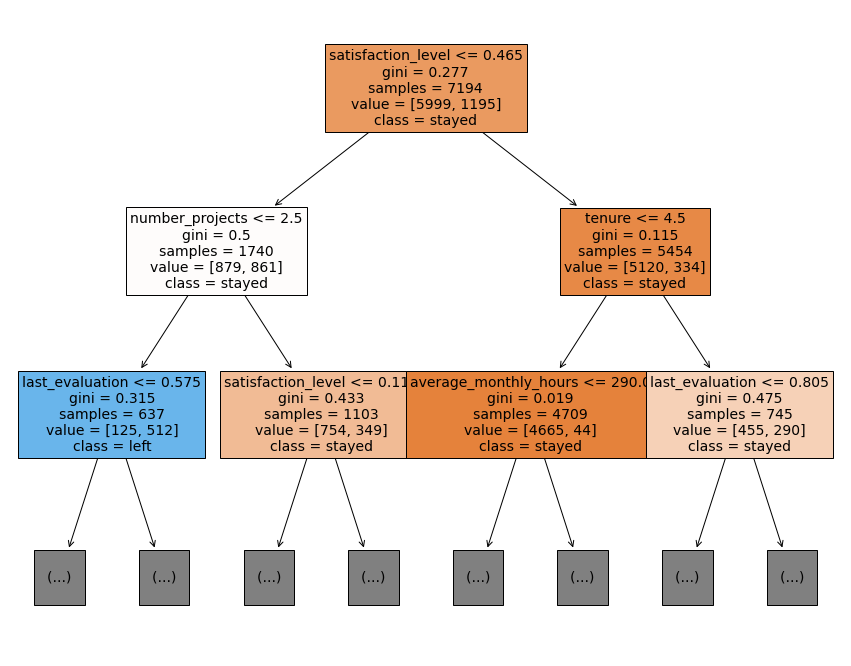

In [27]:
plt.figure(figsize=(15, 12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

In [28]:
y_pred = clf.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.99      0.98      0.98      2000
        left       0.92      0.93      0.92       398

    accuracy                           0.97      2398
   macro avg       0.95      0.96      0.95      2398
weighted avg       0.97      0.97      0.97      2398



In [29]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot(values_format='')
    plt.show()

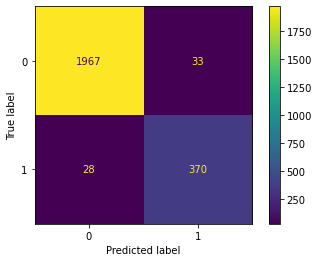

In [30]:
conf_matrix_plot(clf, X_val, y_val)

In [38]:
%%time
rf = RandomForestClassifier(random_state=0)
cv_params = {'n_estimators': [75, 100, 150, 200],
            'max_depth': [2,3,4,5,6,7, None],
            'min_samples_split': [2,3],
            'min_samples_leaf': [1,2],
            'max_features': [0.3, 0.6]
            }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')
rf_cv.fit(X_tr, y_tr)

CPU times: user 8min 54s, sys: 1.44 s, total: 8min 56s
Wall time: 8min 56s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [32]:
path = '/home/jovyan/work/'
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [33]:
def read_pickle(path, saved_model_name:str):
    with open(path +saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [34]:
write_pickle(path, rf_cv, 'hr_rf_cv')

In [35]:
rf1 = read_pickle(path, 'hr_rf_cv')

In [36]:
rf1.best_score_

0.9163179916317992

In [39]:
rf = make_results('tuned_random_forest', rf_cv)
rf

,Model,F1,Recall,Precision,Accuracy
0,tuned_random_forest,0.951244,0.916318,0.989173,0.984431


In [40]:
results = pd.concat([dt, rf])
results

,Model,F1,Recall,Precision,Accuracy
0,tuned_decision_tree,0.919351,0.916318,0.922917,0.973311
0,tuned_random_forest,0.951244,0.916318,0.989173,0.984431


              precision    recall  f1-score   support

      stayed       0.99      1.00      0.99      2000
        left       0.98      0.93      0.95       398

    accuracy                           0.99      2398
   macro avg       0.98      0.96      0.97      2398
weighted avg       0.99      0.99      0.99      2398



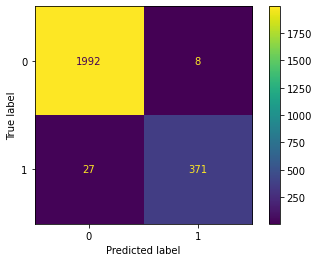

In [41]:
y_pred = rf_cv.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))
conf_matrix_plot(rf_cv, X_val, y_val)

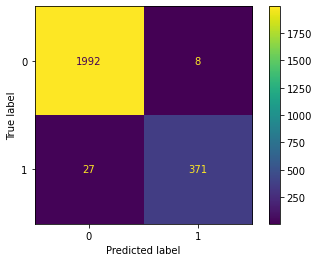

In [42]:
conf_matrix_plot(rf_cv, X_val, y_val)

In [44]:
%%time
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'n_estimators': [75,100, 200, 500],
            'max_depth': [4,6,8,12],
            'min_child_weight': [3,5],
            'learning_rate': [0.1,0.2,0.3]
            }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')
xgb_cv.fit(X_tr, y_tr)

CPU times: user 16min 55s, sys: 6.51 s, total: 17min 1s
Wall time: 8min 33s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.

In [45]:
write_pickle(path, xgb_cv, 'xgb_cv')

In [46]:
#write_pickle(path, xgb_cv, 'xgb_cv')
xgb_cv = read_pickle(path, 'xgb_cv')

In [47]:
xgb_cv.best_score_

0.9154811715481171

In [48]:
xgb = make_results('tuned_xgb', xgb_cv)
results = pd.concat([results, xgb])
results

,Model,F1,Recall,Precision,Accuracy
0,tuned_decision_tree,0.919351,0.916318,0.922917,0.973311
0,tuned_random_forest,0.951244,0.916318,0.989173,0.984431
0,tuned_xgb,0.939010,0.915481,0.964035,0.980261


In [49]:
y_pred = xgb_cv.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.99      0.99      0.99      2000
        left       0.97      0.93      0.95       398

    accuracy                           0.98      2398
   macro avg       0.98      0.96      0.97      2398
weighted avg       0.98      0.98      0.98      2398



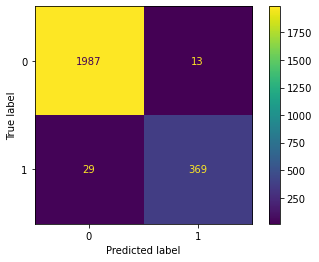

In [50]:
conf_matrix_plot(xgb_cv, X_val, y_val)

In [51]:
# The results of the three models have been gotten. The main evaluation metric is recall, but the xgb boost model 
#random forest models have same recall value from their classificatiob report, hence,but the confusion matrix shows the tuned random forest makes fewer errors.
# The champion model is the random forest model and can be tested on the test data.
# testing on the test data follows.
y_pred = rf_cv.best_estimator_.predict(X_test)
target_labels = ['stayed', 'left']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

      stayed       0.98      1.00      0.99      2001
        left       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



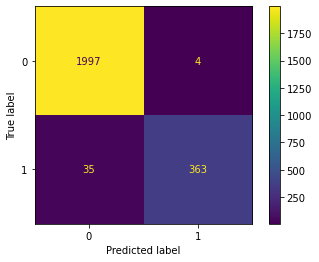

In [52]:
conf_matrix_plot(rf_cv, X_test, y_test)

The model performs slighly worse on test data but non the less has a good recall score. It pr

The model cannot not be deployed for production due to data leakage. Some information used in training the model would not necessarilly be available when using real world data. Hence, a bit of feature enginerring is done to better suit the model for handling real world data.


In [53]:
df0_subset.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [54]:
y = df0_subset['left']
df0_subset['overworked'] = (df0_subset['average_monthly_hours'] > 175).astype(int)
df0_subset.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [55]:
X = df0_subset.copy()
X = X.drop(['satisfaction_level', 'average_monthly_hours', 'left'], axis=1)
X['salary'] = X['salary'].map({'low': 0, 'medium': 1, 'high':2})
X.head()

,last_evaluation,number_projects,tenure,work_accident,promotion_last_5years,department,salary,overworked
0,0.53,2,3,0,0,sales,0,0
1,0.86,5,6,0,0,sales,1,1
2,0.88,7,4,0,0,sales,1,1
3,0.87,5,5,0,0,sales,0,1
4,0.52,2,3,0,0,sales,0,0


In [56]:
X = pd.get_dummies(X)
X.head()

,last_evaluation,number_projects,tenure,work_accident,promotion_last_5years,salary,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,6,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,4,0,0,1,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42)
X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape 

((7194, 17), (2398, 17), (2399, 17), (7194,), (2398,), (2399,))

In [58]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)
tree_para = {'max_depth':[1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf':[2,3,4,5,6,7,8,9, 10,15,20,50]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring, cv=5, refit='recall')
clf.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [59]:
clf.best_score_

0.9029288702928872

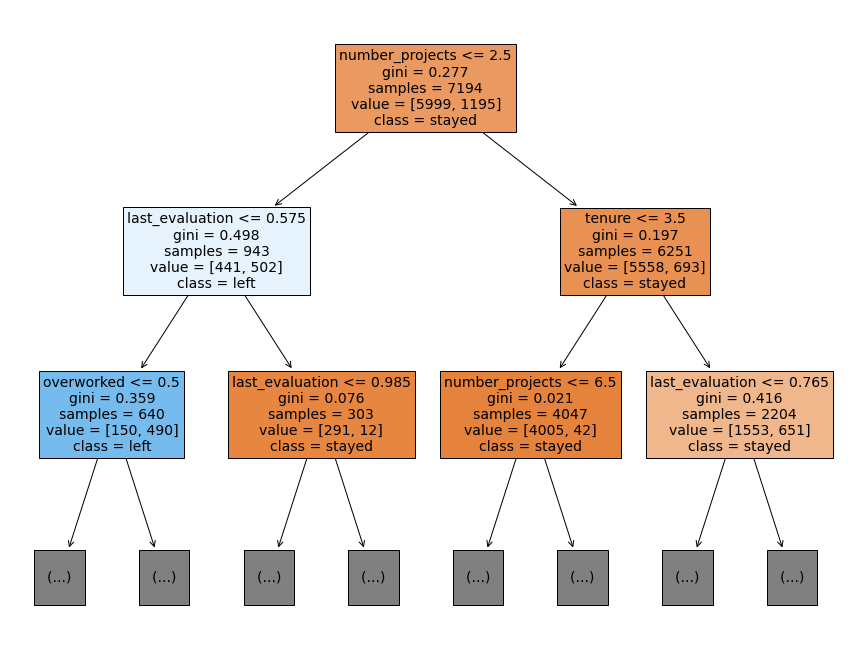

In [60]:
plt.figure(figsize=(15, 12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

In [61]:
dt2_result = make_results('tuned_decision_tree2', clf)
dt2_result

,Model,F1,Recall,Precision,Accuracy
0,tuned_decision_tree2,0.860372,0.902929,0.8225,0.951209


              precision    recall  f1-score   support

      stayed       0.98      0.95      0.97      2000
        left       0.79      0.90      0.84       398

    accuracy                           0.94      2398
   macro avg       0.88      0.93      0.90      2398
weighted avg       0.95      0.94      0.95      2398



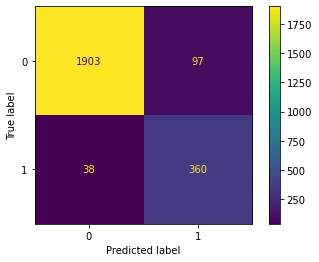

In [62]:
y_pred = clf.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))
conf_matrix_plot(clf, X_val, y_val)

In [64]:
%%time
rf_2 = RandomForestClassifier(random_state=0)
cv_params = {'n_estimators': [75, 100, 150, 200],
            'max_depth': [2,3,4,5,6,7, None],
            'min_samples_split': [2,3],
            'min_samples_leaf': [1,2],
            'max_features': [0.3, 0.6]
            }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf2_cv = GridSearchCV(rf_2, cv_params, scoring=scoring, cv=5, refit='recall')
rf2_cv.fit(X_tr, y_tr)

CPU times: user 7min 23s, sys: 1.5 s, total: 7min 24s
Wall time: 7min 25s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [65]:
write_pickle(path, rf2_cv, 'rf2_cv')

In [66]:
rf2 = read_pickle(path, 'rf2_cv')

In [67]:
rf2_cv.best_score_

0.897071129707113

In [68]:
rf2_result = make_results('tuned_random_forest2', rf2_cv)
results2 = pd.concat([dt2_result, rf2_result])
results2

,Model,F1,Recall,Precision,Accuracy
0,tuned_decision_tree2,0.860372,0.902929,0.822500,0.951209
0,tuned_random_forest2,0.895390,0.897071,0.894185,0.965249


              precision    recall  f1-score   support

      stayed       0.98      0.98      0.98      2000
        left       0.90      0.91      0.91       398

    accuracy                           0.97      2398
   macro avg       0.94      0.94      0.94      2398
weighted avg       0.97      0.97      0.97      2398



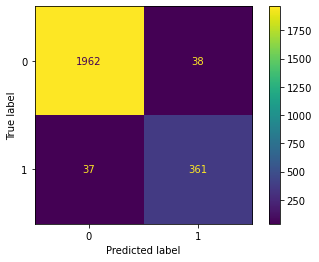

In [69]:
y_pred = rf2.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))
conf_matrix_plot(rf2, X_val, y_val)

In [70]:
%%time
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'n_estimators': [75,100, 200, 500],
            'max_depth': [4,6,8,12],
            'min_child_weight': [3,5],
            'learning_rate': [0.1,0.2,0.3]
            }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb2_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')
xgb2_cv.fit(X_tr, y_tr)

CPU times: user 17min 39s, sys: 7.99 s, total: 17min 47s
Wall time: 8min 56s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.

In [71]:
write_pickle(path, xgb2_cv, 'xgb2_cv')

In [72]:
xgb2 = read_pickle(path, 'xgb2_cv')

In [73]:
xgb2_cv.best_score_

0.8794979079497907

In [74]:
xgb2_result = make_results('tuned_xgboost2', xgb2_cv)
results2 = pd.concat([xgb2_result, results2])
results2

,Model,F1,Recall,Precision,Accuracy
0,tuned_xgboost2,0.891610,0.879498,0.904660,0.964554
0,tuned_decision_tree2,0.860372,0.902929,0.822500,0.951209
0,tuned_random_forest2,0.895390,0.897071,0.894185,0.965249


              precision    recall  f1-score   support

      stayed       0.98      0.98      0.98      2000
        left       0.90      0.89      0.89       398

    accuracy                           0.96      2398
   macro avg       0.94      0.93      0.94      2398
weighted avg       0.96      0.96      0.96      2398



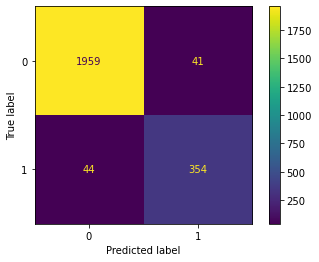

In [75]:
y_pred = xgb2.best_estimator_.predict(X_val)
target_labels = ['stayed', 'left']
print(classification_report(y_val, y_pred, target_names=target_labels))
conf_matrix_plot(xgb2, X_val, y_val)

Based on performance on the validation data as seen from the classification report and the confusion matrix display, the random forest model is the champion model

In [76]:
y_pred = rf2_cv.best_estimator_.predict(X_test)
target_labels = ['stayed', 'left']
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

      stayed       0.98      0.98      0.98      2001
        left       0.91      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



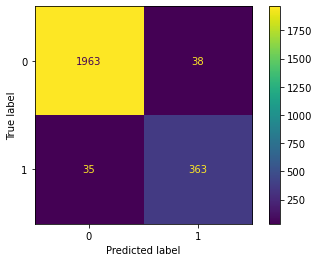

In [77]:
conf_matrix_plot(rf2_cv, X_test, y_test)

In [78]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [82]:
get_scores('champion model', rf2_cv, X_test, y_test)


,model,precision,recall,f1,accuracy,AUC
0,champion model,0.905237,0.91206,0.908636,0.969571,0.946535


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

6 models were built. Initially a decision tree, random forest, and XGBoost model were built, each with particularly high score, which led to concerns about data leakage. This was thus fixed, and a decision tree, random forest, and XGBoost model were built. Thr random forest outperformed the XGBoost and decison models, and had a precision score of 0.905237, a recall	score of 0.91206, accuracy score of 0.908636, fl score of 0.969571.

### Conclusion, Recommendations, Next Steps
1. There should be cap on hours worked weekly, and if possible hours spent working overtime can be incentivized.
2. There should be review on promotion policies, and workers who work on more projects and hours, with great evaluation scores should be strongly considered.
3. There should be a review of policies for employees who have spent 3-5 years at the company  as they seem to leave more often despite working longer hours.
4. There should be cap on projects undertaken by employees to prevent spending longer hours working. If employees take more projects than the cap, it should be voluntary and rewarded.
5. More feedback is required from employees who have spent 4-5 years in the compamy and have reported to be greatly satisfied, yet left the company.
